# Lab 4 # Decision Tree parameters and classification metrics.

Group members:
- Name (ID): Sai Sahas Elluru (0753808)
- Name (ID): Hari Sai Palem (0747511)
- Name (ID): Siddharth Singh (0756590)

In this lab, the main objective is to understand the parameters of the Decision Tree model and how to evaluate the model based on the different metrics we studied.

By the end of this lab you should have:

- a good understanding of the effect of the different parameters in the Decision Tree classifier.
- gained experience with building ROC curves, AUC and ploting the results.

### Grading

This lab will be graded as follows:
- 50% for comments/text
    - Half of the lab grade will come from an assessment of the comments/text included in your Jupyter notebook submission
        - The comments/text should explain clearly what you are doing and why it's necessary to achieve the objective
        - You should think of the comments/text as if you were creating a tutorial/blog to guide someone through your work 
- 50% for code
    - Half of the lab grade will come from an assessment of your code
        - The code in the notebook should use base python, NumPy, Pandas, sklearn, and/or matplotlib. 
        - All code cells should run error free
        - The code does not have to be optimized or pretty: it needs to be functional for the specific task

### Submition

This is a **group submission** lab, so work in the same groups that you are already assigned to.

You should submit the following:
- a well-commented Jupyter notebook
- the original dataset used as a .csv file

### Instructions
Use the same dataset that you used for the marked lab #3. If your dataset is bigger than 1,000 rows, you can truncate the dataset to only 1,000 rows to avoid CPU performance issues and explain how you performed the cut.

Make sure to explain your steps, results and observations at each step.

Use the last 3 digits from any of your group team members user ID as a random state variable where applicable and do implement the following:

1- Using nested loops and with a split ratio of 20 testing:80 training, try to find the best combined parameters that provide the best accuracy for the testing dataset from:
- max_depth values between 3 and 4 with a step of 1, so possible values are [3,4].
- max_leaf_nodes values between 10 and 15 with a step of 5, so possible values are [10,15].
- min_samples_leaf with values between 10 and 20 with a step of 5, so possible values are [10,15,20].

Plot your results for the testing and training accuracies for each step.

Note: you should end up with 12 plots for the above parameter possible valules.

In [1]:
import os
os.chdir('C:\\Users\\rohit\\Downloads\\3217_5288_bundle_archive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('baseball.csv')

In [4]:
data = data.drop('RankSeason',axis=True)
data = data.drop('RankPlayoffs', axis=True)
data = data.drop('OOBP',axis=True)
data = data.drop('OSLG',axis=True)
data = data.drop('Team',axis=True)
data = data.dropna()
data = data[0:1000]
data.shape

(1000, 10)

In [5]:
data.isnull().sum()

League      0
Year        0
RS          0
RA          0
W           0
OBP         0
SLG         0
BA          0
Playoffs    0
G           0
dtype: int64

In [6]:
dummies = pd.get_dummies(data.League,drop_first=True)
dummies.head()

,NL
0,1
1,1
2,0
3,0
4,1


In [7]:
data = pd.concat([data,dummies],axis=1)
data = data.drop('League',axis=1)
data.head()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,NL
0,2012,734,688,81,0.328,0.418,0.259,0,162,1
1,2012,700,600,94,0.320,0.389,0.247,1,162,1
2,2012,712,705,93,0.311,0.417,0.247,1,162,0
3,2012,734,806,69,0.315,0.415,0.260,0,162,0
4,2012,613,759,61,0.302,0.378,0.240,0,162,1


In [8]:
x = data.drop('Playoffs',axis=True)
y = data.iloc[:,7]

In [9]:
x.shape

(1000, 9)

In [10]:
y.shape

(1000,)

Till here we have used pandas to get the data ready in the required format. Making sure there are no nulls and using dummies to convert string of categorical in to int of Categorical. We also splitting the data into x and y i.e. x consists of feature variables and y consists of target variable.

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state = 590)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.metrics import accuracy_score

Using sklearn we have split the data into train and test in the ratio of 80:20. We have also determined the decision tree classifier and stored it into a variable 'dt'

acc_test value for a, b, c =  [3, 10, 10] is: 0.9
acc_train value for a, b, c =  [3, 10, 10] is: 0.93


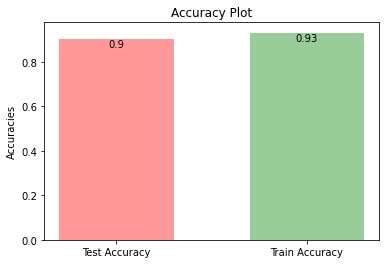

acc_test value for a, b, c =  [3, 10, 15] is: 0.9
acc_train value for a, b, c =  [3, 10, 15] is: 0.92625


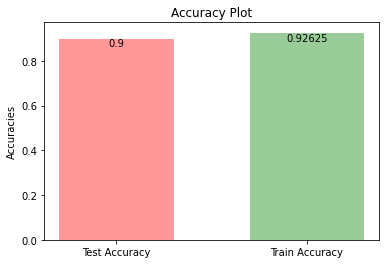

acc_test value for a, b, c =  [3, 10, 20] is: 0.9
acc_train value for a, b, c =  [3, 10, 20] is: 0.92625


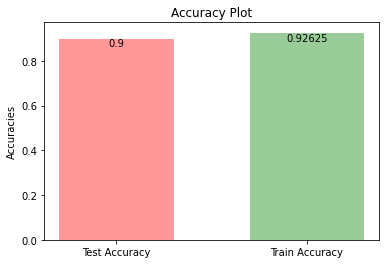

acc_test value for a, b, c =  [3, 15, 10] is: 0.9
acc_train value for a, b, c =  [3, 15, 10] is: 0.93


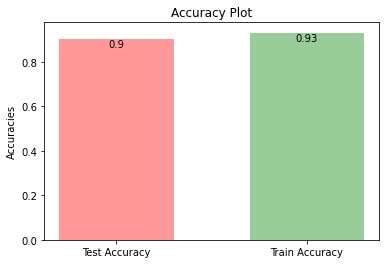

acc_test value for a, b, c =  [3, 15, 15] is: 0.9
acc_train value for a, b, c =  [3, 15, 15] is: 0.92625


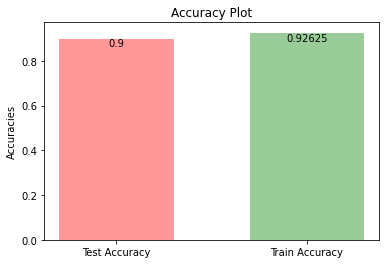

acc_test value for a, b, c =  [3, 15, 20] is: 0.9
acc_train value for a, b, c =  [3, 15, 20] is: 0.92625


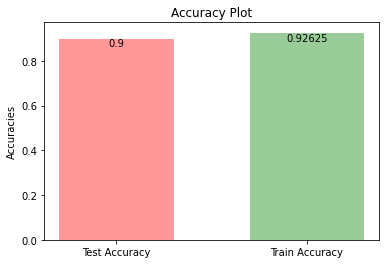

acc_test value for a, b, c =  [4, 10, 10] is: 0.885
acc_train value for a, b, c =  [4, 10, 10] is: 0.9375


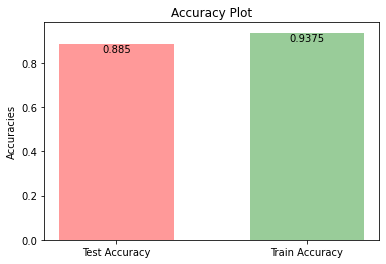

acc_test value for a, b, c =  [4, 10, 15] is: 0.9
acc_train value for a, b, c =  [4, 10, 15] is: 0.935


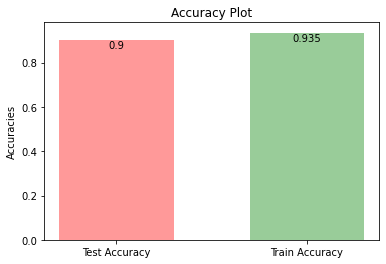

acc_test value for a, b, c =  [4, 10, 20] is: 0.89
acc_train value for a, b, c =  [4, 10, 20] is: 0.9325


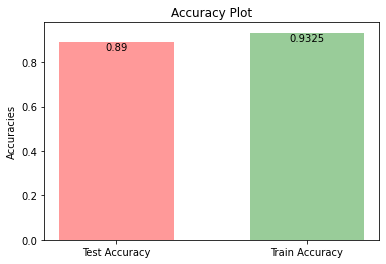

acc_test value for a, b, c =  [4, 15, 10] is: 0.885
acc_train value for a, b, c =  [4, 15, 10] is: 0.9375


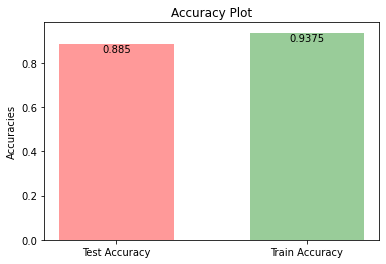

acc_test value for a, b, c =  [4, 15, 15] is: 0.9
acc_train value for a, b, c =  [4, 15, 15] is: 0.935


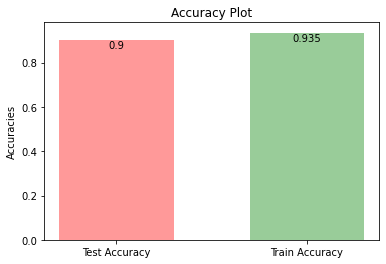

acc_test value for a, b, c =  [4, 15, 20] is: 0.89
acc_train value for a, b, c =  [4, 15, 20] is: 0.9325


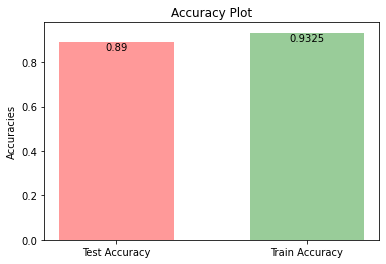

In [13]:
accuracy_test = []
accuracy_train = []
maxdepth = [3,4]
maxleaf = [10,15]
minsampleaf = [10,15,20]
for a in maxdepth:
    for b in maxleaf:
        for c in minsampleaf:
            dt = DecisionTreeClassifier(max_depth = a, max_leaf_nodes = b, min_samples_leaf = c)
            dt.fit(x_train, y_train)  #fit the model
            y_pred = dt.predict(x_test)
            testaccuracy = accuracy_score(y_test,y_pred)  
            accuracy_test.append(testaccuracy)
            print( 'acc_test value for a, b, c = ' , [a, b, c] , 'is:', testaccuracy)
            y_pred2 = dt.predict(x_train)
            trainaccuracy = accuracy_score(y_train,y_pred2)
            accuracy_train.append(trainaccuracy)
            print( 'acc_train value for a, b, c = ' , [a, b, c] , 'is:', trainaccuracy)
            objects = ('Test Accuracy', 'Train Accuracy')
            y = np.arange(len(objects))
            Accuracy = [testaccuracy, trainaccuracy]
            plt.bar(y, Accuracy, width = 0.6, align = 'center', alpha=0.4, color = ['red', 'green'])
            for index, value in enumerate(Accuracy): 
                plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='top', alpha = 1.0)
            plt.xticks(y, objects)
            plt.ylabel('Accuracies')
            plt.title('Accuracy Plot')
            plt.show()

We are using nested for loops to determine the best combomiation of max_depth, max_leaf_nodes, min_sample_nodes of the tree by calculating the Testing accuracy and training accuracy. Plot those results will give better understanding of each combination. We plotted test accuracy and train accuracy for each combination using bar chart from matplotlib. Using different parameters like alpha, alignment, color we have made the graph more simpler to understand. Using plt.text we have labeled the values on top the bars.

In [14]:
dt = DecisionTreeClassifier(min_samples_leaf = 10, max_depth = 3, max_leaf_nodes = 15)
dt.fit(x_train,y_train)
yPred = dt.predict(x_test)
accuracy_score(y_test,yPred)

0.9

After examining all the 12 combinations we have picked the combination which has better accuracy.

2- Explain your plots and results.

Each parameter of decission tree classifier has significance. Max depth represents how many layers does a tree need to spread. If max_depth is higher then there is a high chance of overfitting vice versa if it is lower then there is a chance that the tree not recognize the impoertance of features. Over here we are comparing max_depth of 3 and 4 we take 3 as our ideal since it lead to high accuracy.

max_leaf_nodes determines the tree with max_leaf_nodes in best first fashion. Best nodes are defined as relative reduction in impurity. So we will go for higher max_leaf_nodes. By that condition for max_leaf_node 15 the accuracy is higher.

min_sample_leaf: leaf node is a node without any children(without any further splits). This value used to stop split of leafs to certain samples. This reduces overfitting and complexity. By this condition for min_sample_leaf 10 the accuracy is higher.

So for the combination max_depth:3, max_leaf_nodes:15, and min_sample_leaf:10 the testing accuracy is 0.9.

[max_depth, max_leaf_nodes, min_sample_leafs] = [a, b, c]
So for the combos [3,10,10], [3,10,15], [3,10,20], [3,15,10], [3,15,15], [3,15,20], [4,10,15], [4,15,15] has the highest testing accuracies of 0.9 and slight difference in training accuracies. But if we go with high training accuracy we have to select [4,10,15], but the reason for high training accuracy can be because of max_depth. Because high max_depths tends to over recognize the patterns. 

So by the above stated reasons we select [3,15,10] which has test accuracy 0.9 and train accuracy 0.93.

Rest all combos failed in the very first condition of better test accuracy.


In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

3- Create a for loop that splits the data into testing and training datasets starting from 5:95 ratio until you reach 20:80 ratio with a step of 5, on each step do the following:
- Implement the Decision Trees classifier with the three parameters values found in step 1
- Calculate and display the Confusion Matrix.
- Calculate the AUC and the classification report and display them.
- Plot the ROC curve.

confusion matrix for testsize  0.05 is 
 [[36  3]
 [ 6  5]]
classification report for testsize 0.05 is 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        39
           1       0.62      0.45      0.53        11

    accuracy                           0.82        50
   macro avg       0.74      0.69      0.71        50
weighted avg       0.81      0.82      0.81        50

auc for  testsize is 
 0.6888111888111889


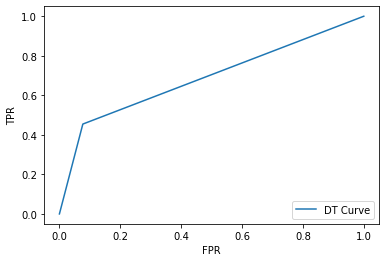


confusion matrix for testsize  0.05 is 
 [[718  28]
 [ 39 165]]
classification report for testsize  0.05 is 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       746
           1       0.85      0.81      0.83       204

    accuracy                           0.93       950
   macro avg       0.90      0.89      0.89       950
weighted avg       0.93      0.93      0.93       950

auc for testsize  0.05 is 
 0.8856450086737108


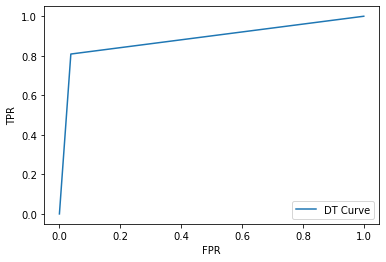

confusion matrix for testsize  0.1 is 
 [[70  4]
 [ 7 19]]
classification report for testsize 0.1 is 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        74
           1       0.83      0.73      0.78        26

    accuracy                           0.89       100
   macro avg       0.87      0.84      0.85       100
weighted avg       0.89      0.89      0.89       100

auc for  testsize is 
 0.8383575883575884


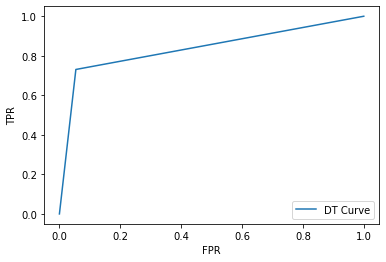


confusion matrix for testsize  0.1 is 
 [[684  27]
 [ 38 151]]
classification report for testsize  0.1 is 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       711
           1       0.85      0.80      0.82       189

    accuracy                           0.93       900
   macro avg       0.90      0.88      0.89       900
weighted avg       0.93      0.93      0.93       900

auc for testsize  0.1 is 
 0.8804835576987476


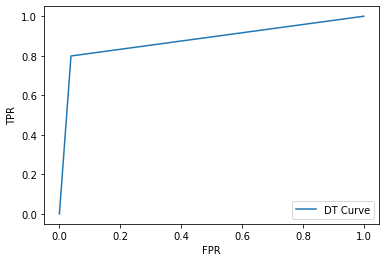

confusion matrix for testsize  0.15 is 
 [[105  12]
 [  7  26]]
classification report for testsize 0.15 is 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       117
           1       0.68      0.79      0.73        33

    accuracy                           0.87       150
   macro avg       0.81      0.84      0.82       150
weighted avg       0.88      0.87      0.88       150

auc for  testsize is 
 0.8426573426573427


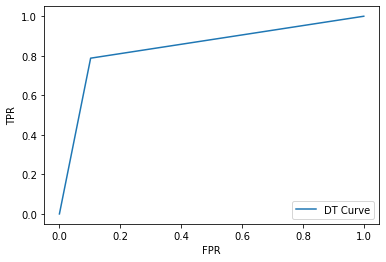


confusion matrix for testsize  0.15 is 
 [[626  42]
 [ 17 165]]
classification report for testsize  0.15 is 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       668
           1       0.80      0.91      0.85       182

    accuracy                           0.93       850
   macro avg       0.89      0.92      0.90       850
weighted avg       0.94      0.93      0.93       850

auc for testsize  0.15 is 
 0.9218595775482002


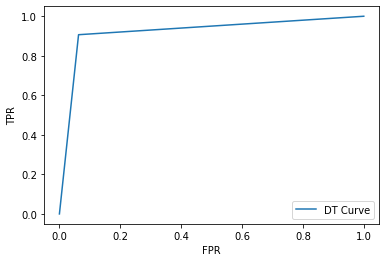

confusion matrix for testsize  0.2 is 
 [[146  10]
 [ 10  34]]
classification report for testsize 0.2 is 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       156
           1       0.77      0.77      0.77        44

    accuracy                           0.90       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.90      0.90      0.90       200

auc for  testsize is 
 0.8543123543123543


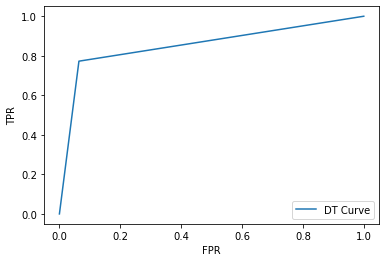


confusion matrix for testsize  0.2 is 
 [[608  21]
 [ 35 136]]
classification report for testsize  0.2 is 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       629
           1       0.87      0.80      0.83       171

    accuracy                           0.93       800
   macro avg       0.91      0.88      0.89       800
weighted avg       0.93      0.93      0.93       800

auc for testsize  0.2 is 
 0.880967654961463


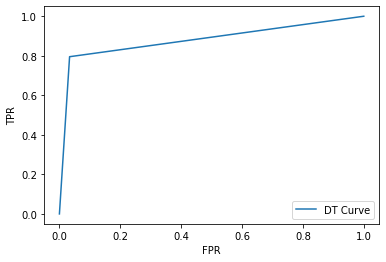

In [61]:
x = data.drop('Playoffs',axis=True)
y = data.iloc[:,7]
for testsize in [0.05,0.1,0.15,0.20]:
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=testsize, random_state = 590)    
    dt = DecisionTreeClassifier(min_samples_leaf = 10, max_depth = 3, max_leaf_nodes = 10)

    dt.fit(x_train, y_train)  #fit the model
    y_pred = dt.predict(x_test)
    confusion = confusion_matrix(y_test,y_pred)
    report =  classification_report(y_test,y_pred)
    auc = roc_auc_score(y_test,y_pred)
    fpr, tpr, _ = roc_curve(y_test,y_pred)
    dtplot = plt.plot(fpr,tpr,label="DT Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend(loc=4)
    print( 'confusion matrix for testsize ', testsize, 'is' , '\n' ,confusion)
    print( 'classification report for testsize', testsize, 'is' , '\n', report)
    print( 'auc for  testsize', 'is' , '\n', auc)
    plt.show()
    #print('plot for testsize ', testsize, dtplot)
    y_pred2 = dt.predict(x_train)    
    confusion_2 = confusion_matrix(y_train,y_pred2)
    report_2 =  classification_report(y_train,y_pred2)
    auc_2 = roc_auc_score(y_train,y_pred2)
    fpr_2, tpr_2, _ = roc_curve(y_train,y_pred2)
    dtplot_2 = plt.plot(fpr_2,tpr_2,label="DT Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend(loc=4)
    print()
    print( 'confusion matrix for testsize ', testsize, 'is' , '\n' ,confusion_2)
    print( 'classification report for testsize ', testsize, 'is' , '\n', report_2)
    print( 'auc for testsize ', testsize, 'is' , '\n', auc_2)
    plt.show()
    #print('plot for testsize ', testsize, dtplot_2)


Using for loop for test sizes of 0.05,0.1,0.15,0.2 we have created models. And also calculated the metrics of decision tree classifier, which are confusion matrix, precision, recall, f1-score, support, AUC, and ROC curve. Each have its own significance in determining the best model. Using matplotlib we have plotted roc curve by FPR and TPR.

4- Explain your results shown in step #3.

Rather than comparing each metric to determine the best model, we use ROC curve to do that. ROC curve is plotted using FPR and TPR. 

False Positive Rate(FPR) is the proportions of samples which are incorrectly classified
True Positive Rate(TPR) is the proportion of the samples which are correctly classified

AUC is Area Under the Curve which is the area under thee ROC curve. The higher the AUC, the better the model.

ROC is Reciever Operating Characteristic. It summarizes all the confusion matrices that each threshold produced. Threshold is like best fit horizantal line. In the plot of feature variables on x axis and target variable (1 or 0) on y axis. This horizantal line divides the curve, which ever feature variables falls above the line is 1 and below the line is 0. Between 0 and 1 there are so many probabilities. Using these we calculate confusion matrices for all probabilites. From these different matrices we calculate FPR & TPR and plot the ROC.

So, from all these curves for the testsize 0.2 has higher AUC value 0.854. This is the ROC curve of y_test and y_pred. So, this is the best decision tree classifier model for this problem.

On a final note the model which gives best results is when the train: test split is 80:20 and the DT paramaters max_depth:3, max_leaf_nodes:15, and min_sample_leaf:10.

5- Is it required to scale the data for the Decision Trees model, why?



Generally, we use the method of scaling to reduce the magnitude difference between the features for the models which use eucladean distance to predict best fit line.

But, in Decision tree classifier we don't use eucladean to detern-mine the best fit line. We have other parameters for that like max_depth, max_leaf_nodes,min_sample_leaf,min_sample_split etc.  A node of a tree partitions the data into two sets by comparing a feature (which splits dataset best) to a threshold value. There's no regularization for the threshold (because one should keep height of the tree small), so it's not affected by different scales. Even if we do scaling it makes no difference in accuracies.

It is required when we are comparing multiple models, like if we are comparing decision tree with SVC. Then we will have to scale the data, since SVC is done through eucledean distance method.